<a href="https://colab.research.google.com/github/AnushkaD26/MNIST_Classification/blob/main/MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten


In [73]:
mnist = tf.keras.datasets.mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [74]:
X_train.shape

(60000, 28, 28)

In [75]:
X_test.shape

(10000, 28, 28)

In [76]:
y_train


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

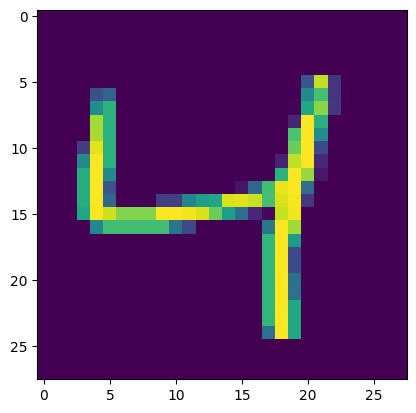

In [77]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [78]:
X_train=X_train/255
X_test=X_test/255

In [79]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [80]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))


In [81]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 32)                4128      
                                                                 
 dense_10 (Dense)            (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [83]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2753 - accuracy: 0.9203 - val_loss: 0.1463 - val_accuracy: 0.9572
Epoch 2/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1158 - accuracy: 0.9659 - val_loss: 0.1113 - val_accuracy: 0.9665
Epoch 3/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0790 - accuracy: 0.9756 - val_loss: 0.1003 - val_accuracy: 0.9702
Epoch 4/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0595 - accuracy: 0.9814 - val_loss: 0.0897 - val_accuracy: 0.9726
Epoch 5/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0467 - accuracy: 0.9851 - val_loss: 0.0951 - val_accuracy: 0.9737
Epoch 6/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0373 - accuracy: 0.9879 - val_loss: 0.1118 - val_accuracy: 0.9702
Epoch 7/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0321 - accuracy: 0.9898 - val_loss: 0.1010 - val_accuracy:

In [84]:
y_prob=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [85]:
y_pred=y_prob.argmax(axis=1)

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9758

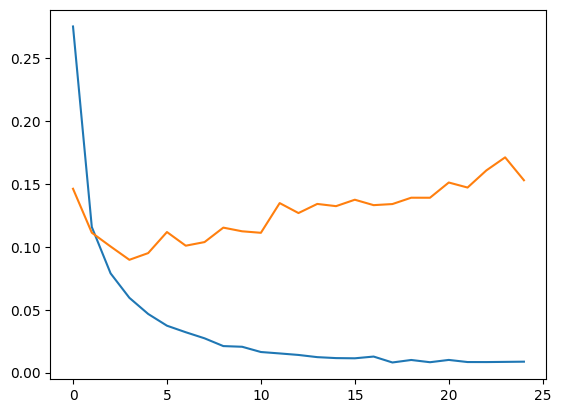

In [87]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

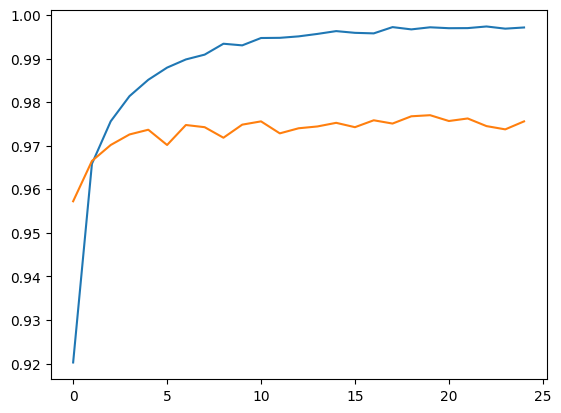

In [88]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

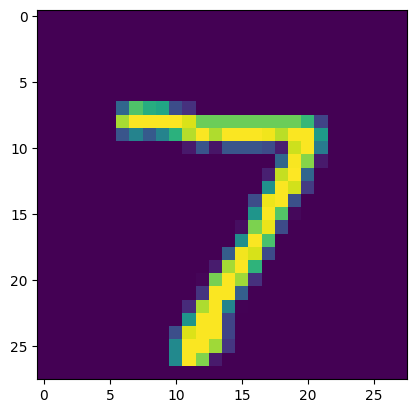

In [89]:
plt.imshow(X_test[0])

In [90]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 23ms/step


array([7])

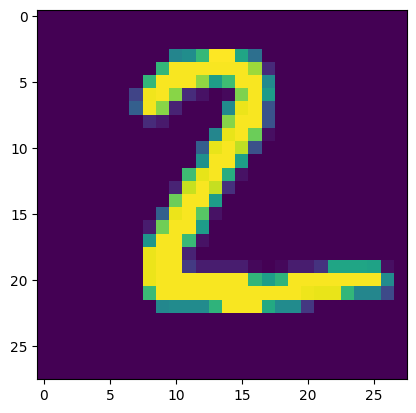

In [91]:
plt.imshow(X_test[1])

In [92]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 24ms/step


array([2])